# This is a solution for Titanic problem from Kaggle competition

## 1. Just for fun uploading the picture of titanic using python 

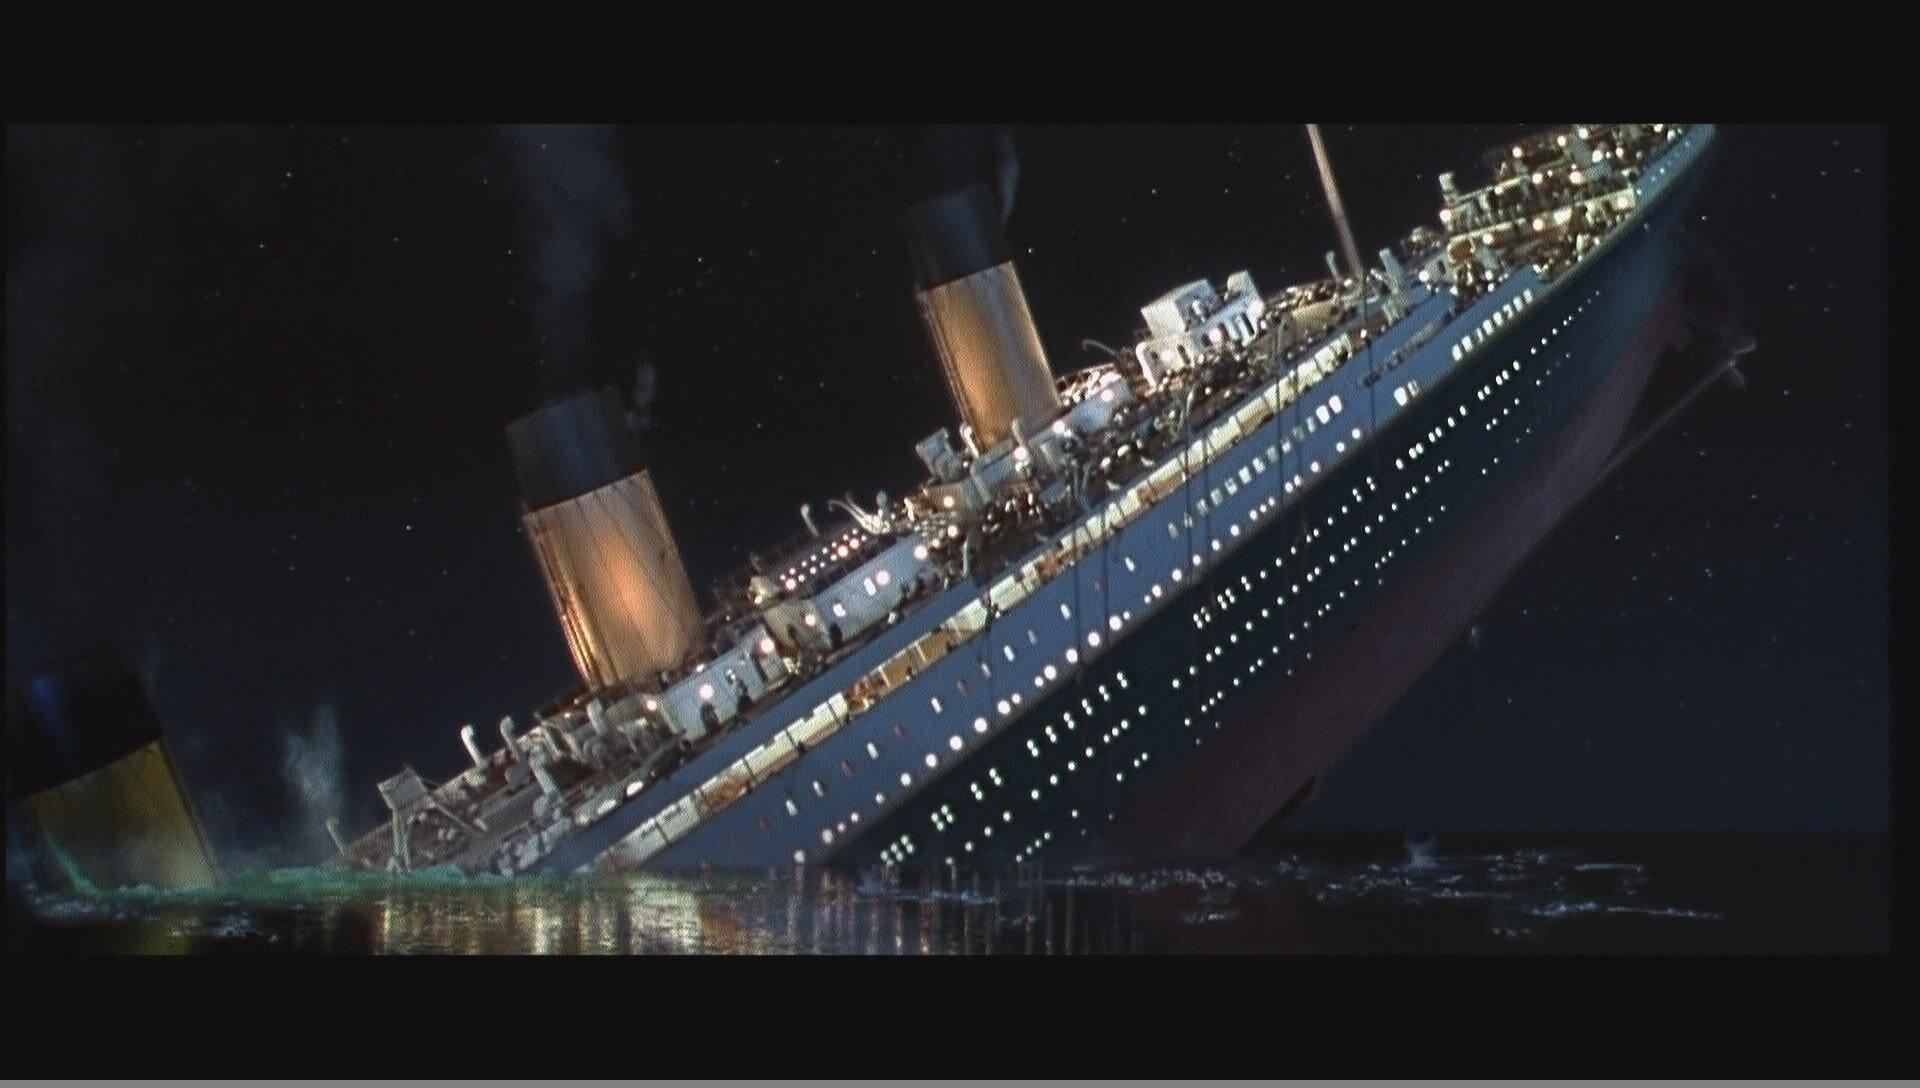

In [137]:
from IPython.display import Image
Image("titanic.jpg")

## 2. Loading the data using pandas

In [138]:
import pandas as pd

Reading the input files (test and train files)

In [139]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

## 3. Data Analysis

This is to see the data dimensions and several features

In [140]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [142]:
train.shape

(891, 12)

In [143]:
test.shape

(418, 11)

In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [145]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


To see the null or NAN or unassigned entries

In [146]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [147]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 4. Visualising data

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [149]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

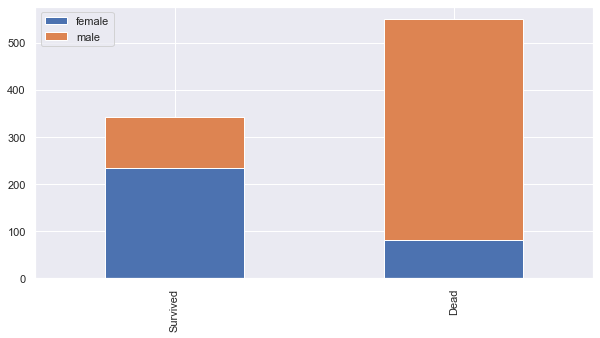

In [150]:
bar_chart('Sex')

From the above graph we can see that the male population has predomently died whereas the majority of females survived

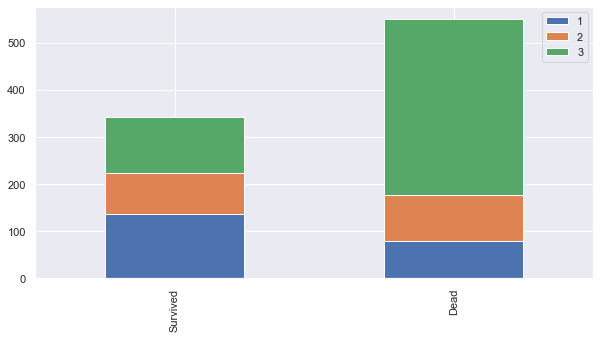

In [151]:
bar_chart('Pclass')

Pclass is passenger class. The majority of first class survived, second class has equal proportion of dead and survival whereas, the majority of third class passengers died.

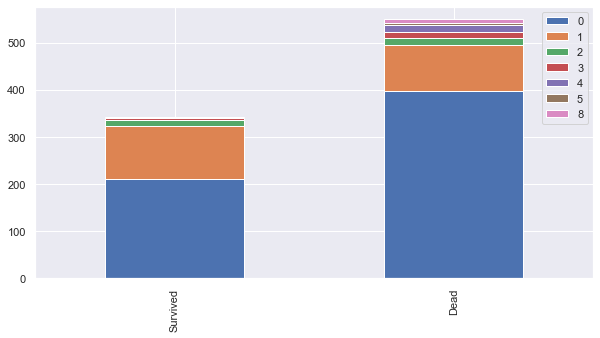

In [152]:
bar_chart('SibSp')

Sibsp is sibling spouse. From the figure we can see that the big families tend to die as the small families tend to survive

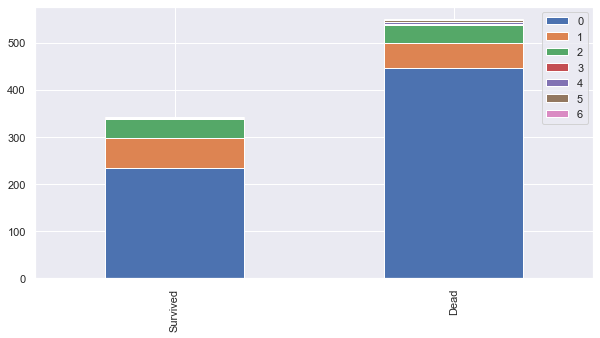

In [153]:
bar_chart('Parch')

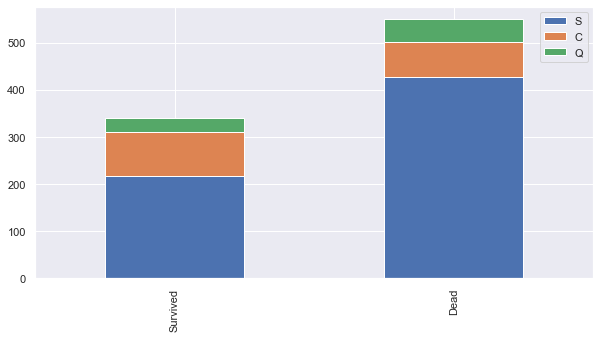

In [154]:
bar_chart('Embarked')

Embarked has equal proportions of survival and dead

## 5. Feature Engineering

The idea of feature engineering is to remove redundant columns and convert text data to numeric data

In [155]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


While doing Feature Engineering it is recommeded to combine test and train data sets

In [157]:
train_test = [train, test]

In [158]:
train_test

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

Extracting the title from the names for the sake of convenience

In [159]:
for dataset in train_test:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [160]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [161]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [162]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Don           1
Capt          1
Ms            1
Mme           1
Lady          1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

In [163]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

Categorising the title and converting the text data to numeric data 

In [164]:
title_mapping={"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Mlle":3, "Col":3, "Major":3, "Sir":3, "Don":3,
             "Capt":3, "Ms":3, "Mme":3, "Lady":3, "Jonkheer":3, "Countess":3, "Dona":3}

for dataset in train_test:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [165]:
train['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

Deleting redundant data from dataset. Here in this case it is column 'Name' as the information is preserved in 'Title'.

In [166]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [167]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [168]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


The column 'Sex' has text data and hence converting it to numeric data

In [169]:
sex_mapping={"male":0, "female":1}

for dataset in train_test:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

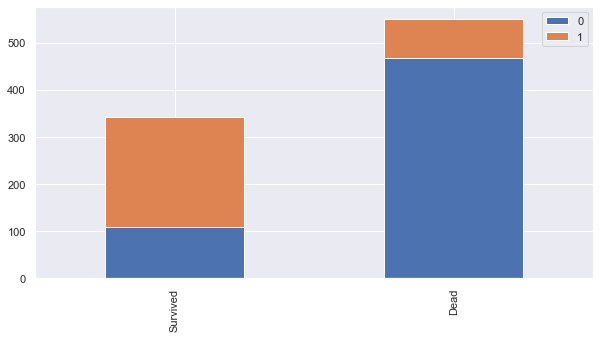

In [170]:
bar_chart('Sex')

Filling the missing 'Age' values with median age according to the relative 'Sex' using 'Title' column

In [171]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

In [172]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

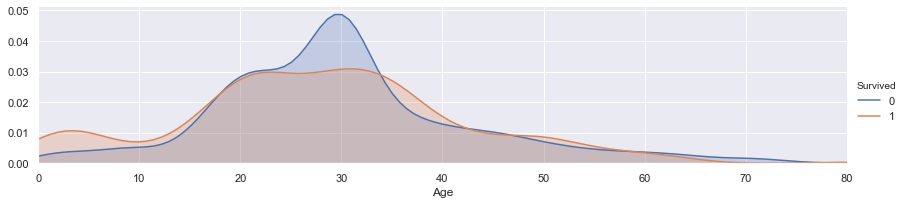

In [173]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

Individual ages are difficult to view. Hence, creating groups for the sake of convenience and to extract meaning from data

In [174]:
for dataset in train_test:
    dataset.loc[dataset['Age']<=16, 'Age']=0,
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26), 'Age']=1,
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36), 'Age']=2,
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62), 'Age']=3,
    dataset.loc[dataset['Age']>62, 'Age']=4

In [175]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


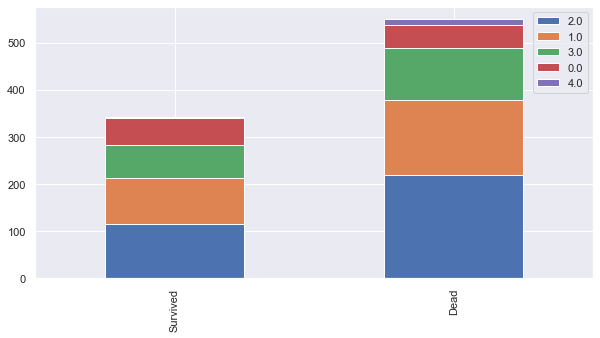

In [176]:
bar_chart('Age')

From the above figure we can infer the older the age the more probability to die.

Categorising the Passenger class

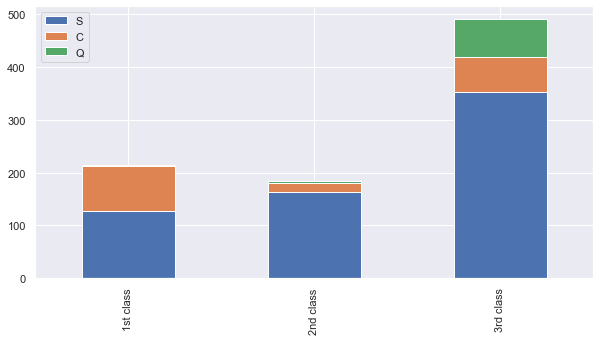

In [177]:
Pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

From the above figure, we can see that majority of the passengers started from 'S' station. Hence it makes more sense to fill the empty/NAN values in 'Embarked' column with 'S'

In [178]:
for dataset in train_test:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [179]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


converting the details of the column 'Embarked' into numeric data

In [180]:
embark_mapping={"S":0, "C":1, "Q":2}

for dataset in train_test:
    dataset['Embarked']=dataset['Embarked'].map(embark_mapping)

The fare is dependent on 'PClass' hence fixing the fare column w.r.t. Pclass

In [181]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)

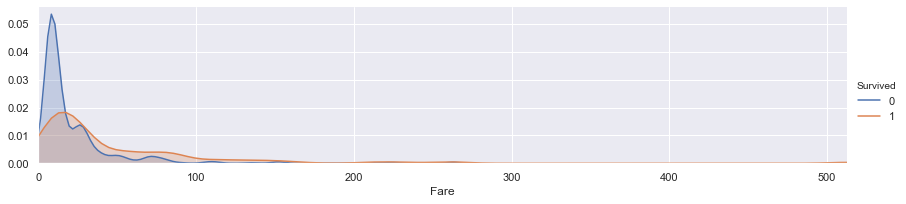

In [182]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.show()

In [183]:
for dataset in train_test:
    dataset.loc[dataset['Fare']<=17, 'Fare']=0,
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30), 'Fare']=1,
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100), 'Fare']=2,
    dataset.loc[dataset['Fare']>100, 'Fare']=3

In [184]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


Extracting the information from 'Cabin' column

In [185]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
E101           3
              ..
A5             1
C95            1
C7             1
D21            1
D48            1
Name: Cabin, Length: 147, dtype: int64

Extracting the first character from each entry

In [186]:
for dataset in train_test:
    dataset['Cabin']=dataset['Cabin'].str[:1]

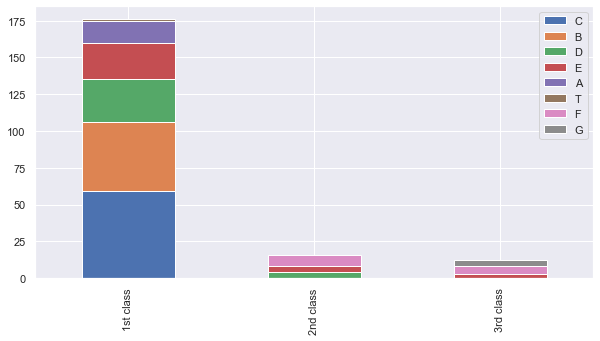

In [187]:
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

Converting into the numeric data

In [188]:
cabin_mapping={"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}

for dataset in train_test:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [189]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [190]:
train["FamilySize"]=train["SibSp"]+train["Parch"]+1
test["FamilySize"]=test["SibSp"]+test["Parch"]+1

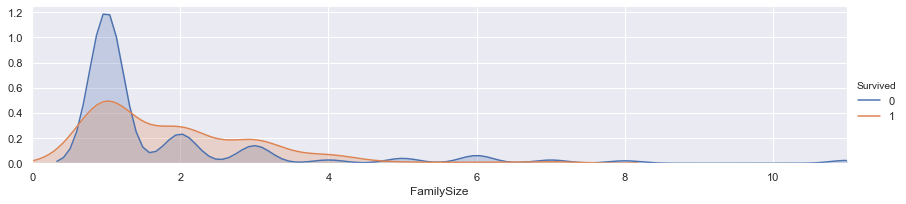

In [191]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()

plt.show()

In [192]:
family_mapping={1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}

for dataset in train_test:
    dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)

In [193]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


The column 'Ticket' information is in'Cabin' column and 'Sibsp','Parch' information is included in 'FamilySize'.

In [194]:
features_drop=['Ticket','SibSp','Parch']
train=train.drop(features_drop, axis=1)
train=train.drop(['PassengerId'], axis=1)
test=test.drop(features_drop, axis=1)

In [195]:
train_data=train.drop('Survived', axis=1)
target=train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [196]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


Finally, we have training data entirely with numeric data

## 6. Training Machine Learning model

In [197]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [198]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


By doing cross validation we are increasing the accuracy 

In [199]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10, shuffle=True, random_state=0)

In [200]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [209]:
round(np.mean(score)*100,2)

82.6

In [210]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.82022472 0.75280899 0.7752809  0.8988764  0.76404494
 0.84269663 0.82022472 0.74157303 0.79775281]


In [211]:
round(np.mean(score)*100,2)

79.8

In [212]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.83146067 0.80898876 0.78651685 0.87640449 0.80898876
 0.82022472 0.82022472 0.7752809  0.83146067]


In [213]:
round(np.mean(score)*100,2)

81.6

In [214]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [215]:
round(np.mean(score)*100,2)

78.78

In [216]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [217]:
round(np.mean(score)*100,2)

83.5

## 7. Testing

In [218]:
clf=SVC()
clf.fit(train_data, target)

test_data=test.drop(['PassengerId'], axis=1).copy()
prediction=clf.predict(test_data)

In [220]:
submission=pd.DataFrame({"PassengerId":test["PassengerId"], "Survived":prediction})
submission.to_csv('submission.csv',index=False)

In [221]:
submission=pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
